Question 2

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [23]:
file = "Resources/merged_data.csv"


original_data = pd.read_csv(file)

original_data.head()

,Country,Year,Value,Population Size in Millions,2020 GDP in USD,GDP Per Capita,Production in Millions
0,Afghanistan,2020,54771898.0,3.892834,2.011614e+10,516.747871,5.477190
1,Albania,2020,12904896.0,0.283785,1.513187e+10,5332.160475,1.290490
2,Algeria,2020,201992285.0,4.385104,1.450092e+11,3306.858208,20.199229
3,Angola,2020,84297733.0,3.286627,5.361907e+10,1631.431691,8.429773
4,Antigua and Barbuda,2020,215545.0,0.009793,1.370281e+09,13992.744480,0.021555


Only filtering out South Asia region

In [24]:
filtered_data = original_data[original_data['Country'].isin(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Nepal', 'Pakistan', 'Sri Lanka'])].reset_index(drop=True)
filtered_data

,Country,Year,Value,Population Size in Millions,2020 GDP in USD,GDP Per Capita,Production in Millions
0,Afghanistan,2020,5.477190e+07,3.892834,2.011614e+10,516.747871,5.477190
1,Bangladesh,2020,5.330869e+08,16.468938,3.739021e+11,2270.347535,53.308693
2,Bhutan,2020,2.096207e+06,0.077161,2.315436e+09,3000.777986,0.209621
3,India,2020,2.472701e+09,138.000439,2.667688e+12,1933.101069,247.270061
4,Nepal,2020,1.353131e+08,2.913681,3.343367e+10,1147.471971,13.531306
5,Pakistan,2020,1.804460e+09,22.089233,3.003063e+11,1359.514522,180.446048
6,Sri Lanka,2020,3.737842e+07,2.191900,8.096968e+10,3694.040948,3.737842


In [25]:
highest_pop = filtered_data.nlargest(7, ["Population Size in Millions"])
highest_pop

,Country,Year,Value,Population Size in Millions,2020 GDP in USD,GDP Per Capita,Production in Millions
3,India,2020,2.472701e+09,138.000439,2.667688e+12,1933.101069,247.270061
5,Pakistan,2020,1.804460e+09,22.089233,3.003063e+11,1359.514522,180.446048
1,Bangladesh,2020,5.330869e+08,16.468938,3.739021e+11,2270.347535,53.308693
0,Afghanistan,2020,5.477190e+07,3.892834,2.011614e+10,516.747871,5.477190
4,Nepal,2020,1.353131e+08,2.913681,3.343367e+10,1147.471971,13.531306
6,Sri Lanka,2020,3.737842e+07,2.191900,8.096968e+10,3694.040948,3.737842
2,Bhutan,2020,2.096207e+06,0.077161,2.315436e+09,3000.777986,0.209621


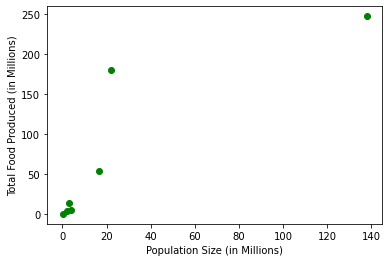

Correlation: 0.86


<Figure size 432x288 with 0 Axes>

In [27]:
x_values=highest_pop["Population Size in Millions"]
y_values=highest_pop["Production in Millions"]
plt.scatter(x_values, y_values, c="green")
plt.xlabel("Population Size (in Millions)")
plt.ylabel("Total Food Produced (in Millions)")

plt.show()
plt.savefig("Graphs/scatter_prod_vs_population.png")
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

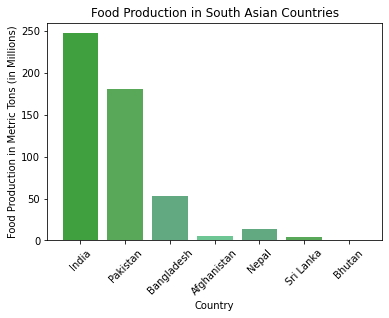

<Figure size 576x432 with 0 Axes>

In [35]:
x = np.array(highest_pop["Country"])
x

y = np.array(highest_pop["Production in Millions"])
y

plt.title("Food Production in South Asian Countries")
plt.xlabel("Country")
plt.ylabel("Food Production in Metric Tons (in Millions)")

plt.xticks(rotation=45)

# plt.yticks(arrange(y.max()),highest_pop["Value"] / 1e7)
plt.bar(x, y, color = ['green', 'forestgreen', 'seagreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'green'], alpha=0.75, align="center")
plt.figure(figsize=(8,6))

# saving as png

plt.savefig("Graphs/food_prod_vs_population.png")

plt.show()

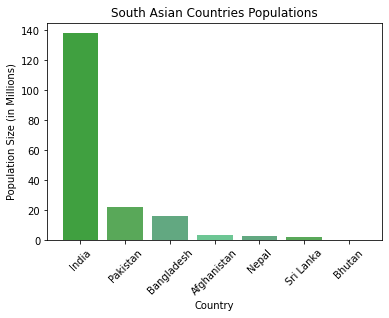

<Figure size 640x480 with 0 Axes>

In [34]:
x = np.array(highest_pop["Country"])
x

y2 = np.array(highest_pop["Population Size in Millions"])
y2

plt.title("South Asian Countries Populations")
plt.xlabel("Country")
plt.ylabel("Population Size (in Millions)")

plt.xticks(rotation=45)
# plt.yticks(arrange(y.max()),highest_pop["Value"] / 1e7)
plt.bar(x, y2, color = ['green', 'forestgreen', 'seagreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'green'], alpha=0.75, align="center")
plt.figure(figsize=(8,6))

# saving as png
plt.savefig("Graphs/population_sizes.png")

plt.show()